In [102]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df=pd.read_csv('normalized_texts.csv')

In [104]:
df.head()

,Title,House,Decade,Year,Category,Movie_len,Avg_WordLen_Movie,Avg_PhrLen_Movie,Avg_WordLen_Phrase,Num_Adjectives,Num_Adverbs
0,Chicken Run,Aardman,2000,2000,Animation,0.205044,0.135699,0.346723,0.200000,0.236763,0.244318
1,Flushed Away,Aardman,2000,2006,Animation,0.509430,0.127349,0.563425,0.090370,0.889111,1.000000
2,Wallace And Gromit In The Curse Of The Were-Ra...,Aardman,2000,2005,Animation,0.082237,0.237996,0.399577,0.245926,0.175824,0.115767
3,A Shaun the Sheep Movie Farmageddon,Aardman,2010,2019,Animation,0.030263,0.000000,0.000000,0.404444,0.000000,0.000710
4,Arthur Christmas,Aardman,2010,2011,Animation,0.391886,0.137787,0.321353,0.242963,0.400599,0.396307


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 11 columns):
Title                 434 non-null object
House                 434 non-null object
Decade                434 non-null int64
Year                  434 non-null int64
Category              434 non-null object
Movie_len             434 non-null float64
Avg_WordLen_Movie     434 non-null float64
Avg_PhrLen_Movie      434 non-null float64
Avg_WordLen_Phrase    434 non-null float64
Num_Adjectives        434 non-null float64
Num_Adverbs           434 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 37.4+ KB


In [106]:
v_name = []
v_type = []
v_domain = []
v_is_null = []
for c in df.columns:
    col_list = df[c]
    v_name.append(c)
    v_type.append(type(col_list[0]))
    v_domain.append(sorted(col_list.unique()))
    v_is_null.append(col_list.isnull().any())
    
d = {'variable': v_name, 'type': v_type, 'domain': v_domain, 'any_null': v_is_null}
pd.DataFrame(data=d).set_index('variable')

,type,domain,any_null
variable,,,
Title,<class 'str'>,"[101 Dalmatians, 102 Dalmatians, A Bug's Life,...",False
House,<class 'str'>,"[Aardman, Blue, Disney, Dreamworks, Illuminati...",False
Decade,<class 'numpy.int64'>,"[1930, 1940, 1950, 1960, 1970, 1980, 1990, 200...",False
Year,<class 'numpy.int64'>,"[1937, 1940, 1941, 1942, 1943, 1944, 1946, 194...",False
Category,<class 'str'>,"[Animation, Animation + Live Action, Live Action]",False
Movie_len,<class 'numpy.float64'>,"[0.0, 0.0125, 0.014912280701754387, 0.03026315...",False
Avg_WordLen_Movie,<class 'numpy.float64'>,"[0.0, 0.06054279749478075, 0.06889352818371608...",False
Avg_PhrLen_Movie,<class 'numpy.float64'>,"[0.0, 0.19344608879492606, 0.19661733615221988...",False
Avg_WordLen_Phrase,<class 'numpy.float64'>,"[0.0, 0.038518518518518514, 0.0474074074074074...",False


In [107]:
df_disney_tot=df[(df['House'] == 'Disney')]
df_disney=df[(df['House'] == 'Disney') & (df['Category'] == 'Animation')]
df_disney_liveaction=df[(df['House'] == 'Disney') & (df['Category'] == 'Live Action')]
df_disney_la=df[(df['House'] == 'Disney') & (df['Category'] == 'Animation + Live Action')]
df_aardman=df[df['House'] == 'Aardman']
df_blue=df[df['House'] == 'Blue']
df_dreamworks=df[df['House'] == 'Dreamworks']
df_illumination=df[df['House'] == 'Illumination']
df_paramount=df[df['House'] == 'Paramount']
df_sony=df[df['House'] == 'Sony']
df_studioghibli=df[df['House'] == 'StudioGhibli']
df_universal=df[df['House'] == 'Universal']

In [108]:
df_paramount.head()

,Title,House,Decade,Year,Category,Movie_len,Avg_WordLen_Movie,Avg_PhrLen_Movie,Avg_WordLen_Phrase,Num_Adjectives,Num_Adverbs
369,Monster Trucks,Paramount,2010,2016,Animation,0.233114,0.110647,0.381607,0.162963,0.221778,0.335938
370,Sherlock Gnomes,Paramount,2010,2018,Animation,0.342325,0.146138,0.369979,0.195556,0.424575,0.424716
371,The SpongeBob Movie Sponge Out of Water,Paramount,2010,2015,Animation,0.288596,0.152401,0.392178,0.214815,0.348651,0.346591
372,Wonder Park,Paramount,2010,2019,Animation,0.291886,0.146138,0.387949,0.194074,0.356643,0.362216


### Plot Indici tutti insieme (Disney Animation)
#### Andamento per decade

In [109]:
#selezione delle colonne con gli indici
indexes=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year']]
#raggruppamento per decade e media degli indici
meandf=df_disney[indexes+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

In [110]:
df_disney.columns.values

array(['Title', 'House', 'Decade', 'Year', 'Category', 'Movie_len',
       'Avg_WordLen_Movie', 'Avg_PhrLen_Movie', 'Avg_WordLen_Phrase',
       'Num_Adjectives', 'Num_Adverbs'], dtype=object)

In [111]:
meandf.head()

Movie_len           Avg_WordLen_Movie           Avg_PhrLen_Movie  \
            mean       std              mean       std             mean   
Decade                                                                    
1930    0.199123       NaN          0.093946       NaN         0.323467   
1940    0.202588  0.095956          0.146973  0.034702         0.391543   
1950    0.262982  0.048092          0.134447  0.017316         0.336786   
1960    0.290278  0.005601          0.121781  0.010508         0.347075   
1970    0.255318  0.048979          0.144050  0.010084         0.367600   

                 Avg_WordLen_Phrase           Num_Adjectives            \
             std               mean       std           mean       std   
Decade                                                                   
1930         NaN           0.162963       NaN       0.252747       NaN   
1940    0.119585           0.192593  0.043332       0.299101  0.122425   
1950    0.016215           0.181037  0.020909       0.330869  0.059078   
1960    0.033450           0.199506  0.052636       0.386280  0.030059   
1970    0.040145           0.202963  0.031497       0.373626  0.072897   

       Num_Adverbs            
              mean       std  
Decade                        
1930      0.213778       NaN  
1940      0.245739  0.118756  
1950      0.297301  0.042630  
1960      0.333807  0.021868  
1970      0.328303  0.078442

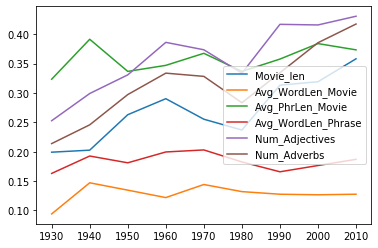

In [112]:
for i in indexes: 

    y=meandf[i]['mean'].values #dal df raggruppato prendo i valori di tutti gli indici
    #print(y)
    x=meandf.index.values #prendo i valori (cioè le decadi) dall'indice del df raggruppato
    #print(x)
    plt.plot(x,y)
    plt.legend(indexes, loc='center right')
plt.show()

### Matrice dei sei indici per decade per tutte le case (solo Animazione)

In [113]:
dataframe_list=df_list=[df_disney, df_aardman, df_blue, df_dreamworks, df_illumination, df_paramount, df_sony, df_studioghibli, df_universal]

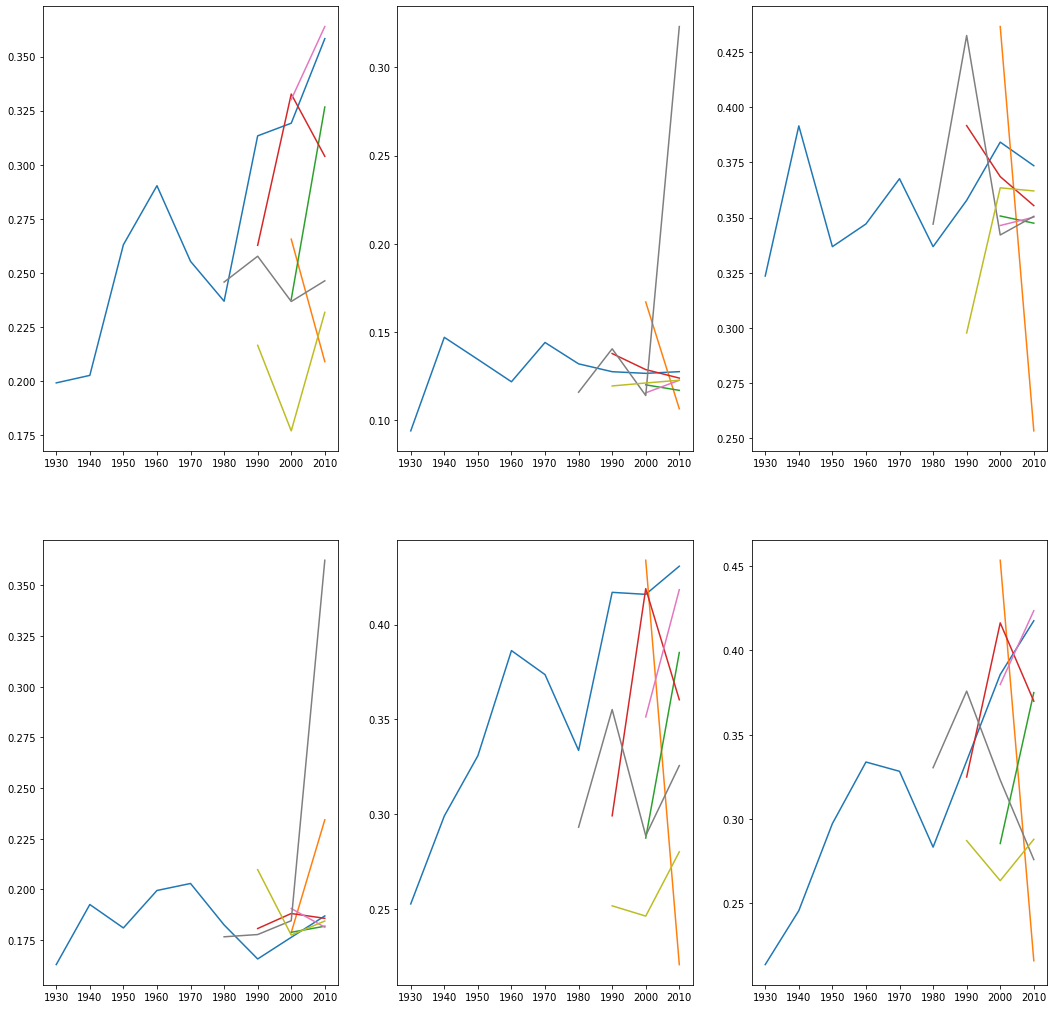

In [114]:
plt.figure(figsize=(18,18))
i=1
for ind in indexes:
    plt.subplot(2,3,i)
    for dataframe in df_list:
        meandf=dataframe[indexes+['Decade']].groupby(['Decade']).agg([np.mean, np.std])
        y=meandf[ind]['mean'].values 
        x=meandf.index.values 
        plt.plot(x,y)
        #plt.legend(houses, loc='center right')
    i+=1
plt.show()

### Matrice di tutti gli indici per la Disney (per categoria e per decade)

In [115]:
disney_df_list=[df_disney, df_disney_liveaction, df_disney_la]

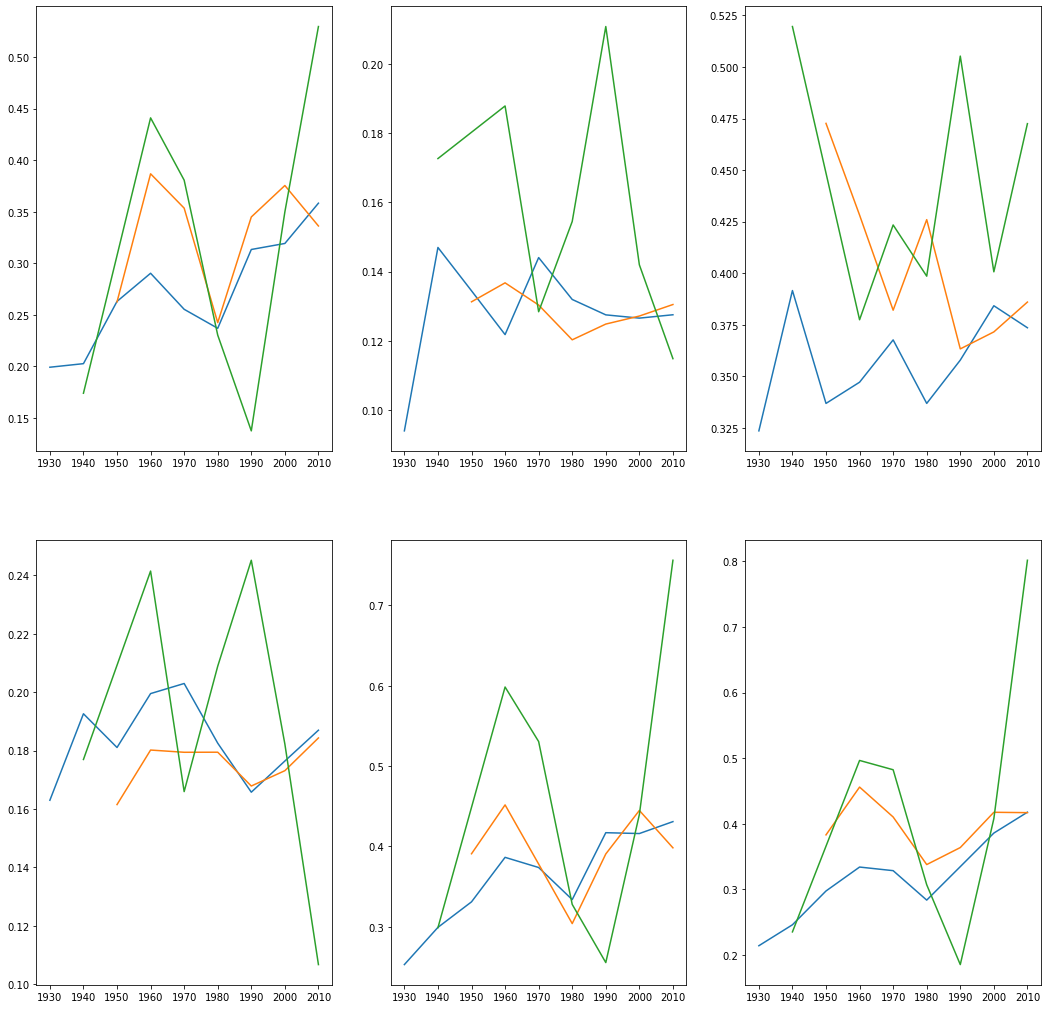

In [116]:
plt.figure(figsize=(18,18))
i=1
for ind in indexes:
    plt.subplot(2,3,i)
    for dataframe in disney_df_list:
        meandf=dataframe[indexes+['Decade']].groupby(['Decade']).agg([np.mean, np.std])
        y=meandf[ind]['mean'].values 
        x=meandf.index.values 
        plt.plot(x,y)
        #plt.legend(dataframe['Category'].values, loc='center right')
    i+=1
plt.show()

### Matrice delle case (Movie_len)

In [117]:
df_list=[df_disney, df_disney_liveaction, df_disney_la, df_aardman, df_blue, df_dreamworks, df_illumination, df_paramount, df_sony, df_studioghibli, df_universal]

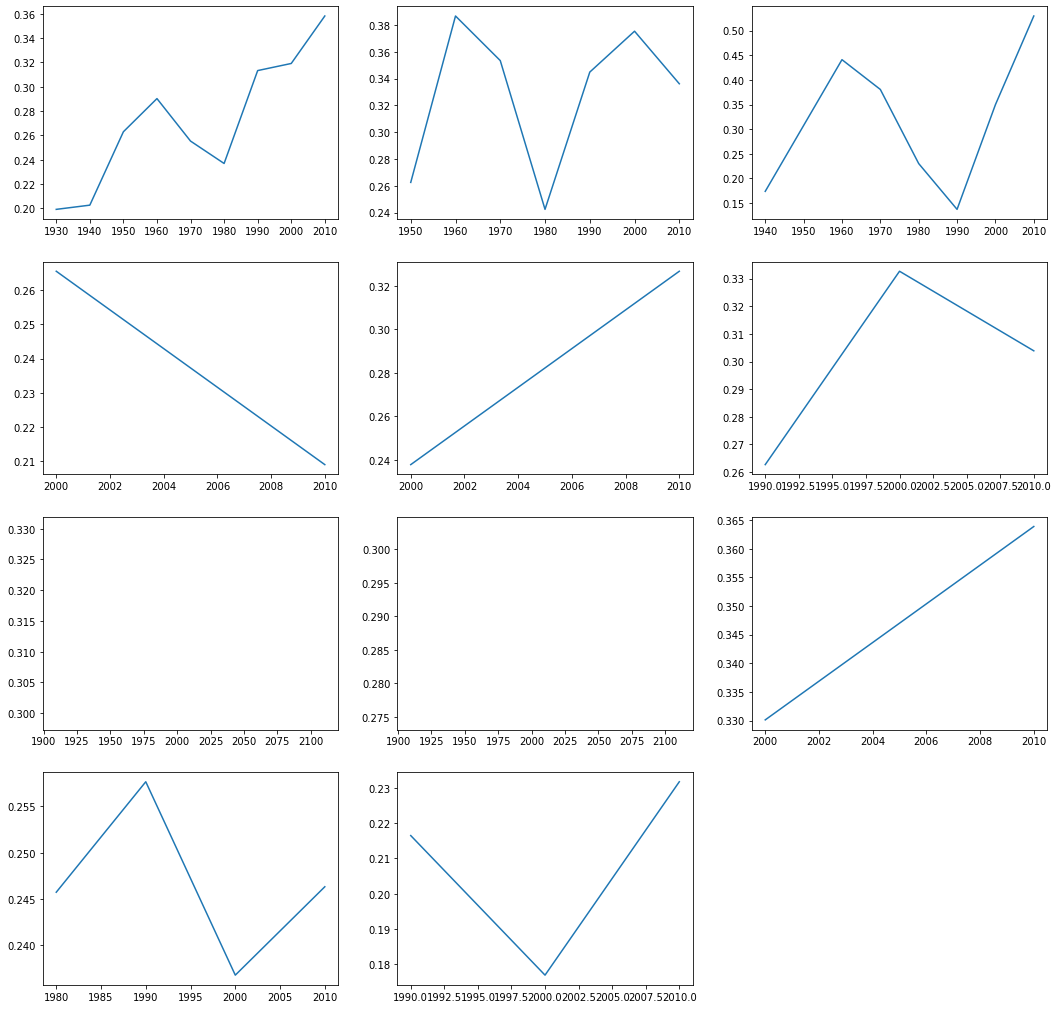

In [118]:
plt.figure(figsize=(18,18))
i=1
for dataframe in df_list:
    
    indexes=dataframe['Movie_len'].values
    meandf=dataframe[['Movie_len','Decade']].groupby(['Decade']).agg(np.mean)

    y=meandf.values
    x=meandf.index.values
    plt.subplot(4,3,i)
    #print(y)
    #print(x)
    plt.plot(x,y)
    i+=1

plt.show() 

### Matrice delle case (Average Phrase Length)

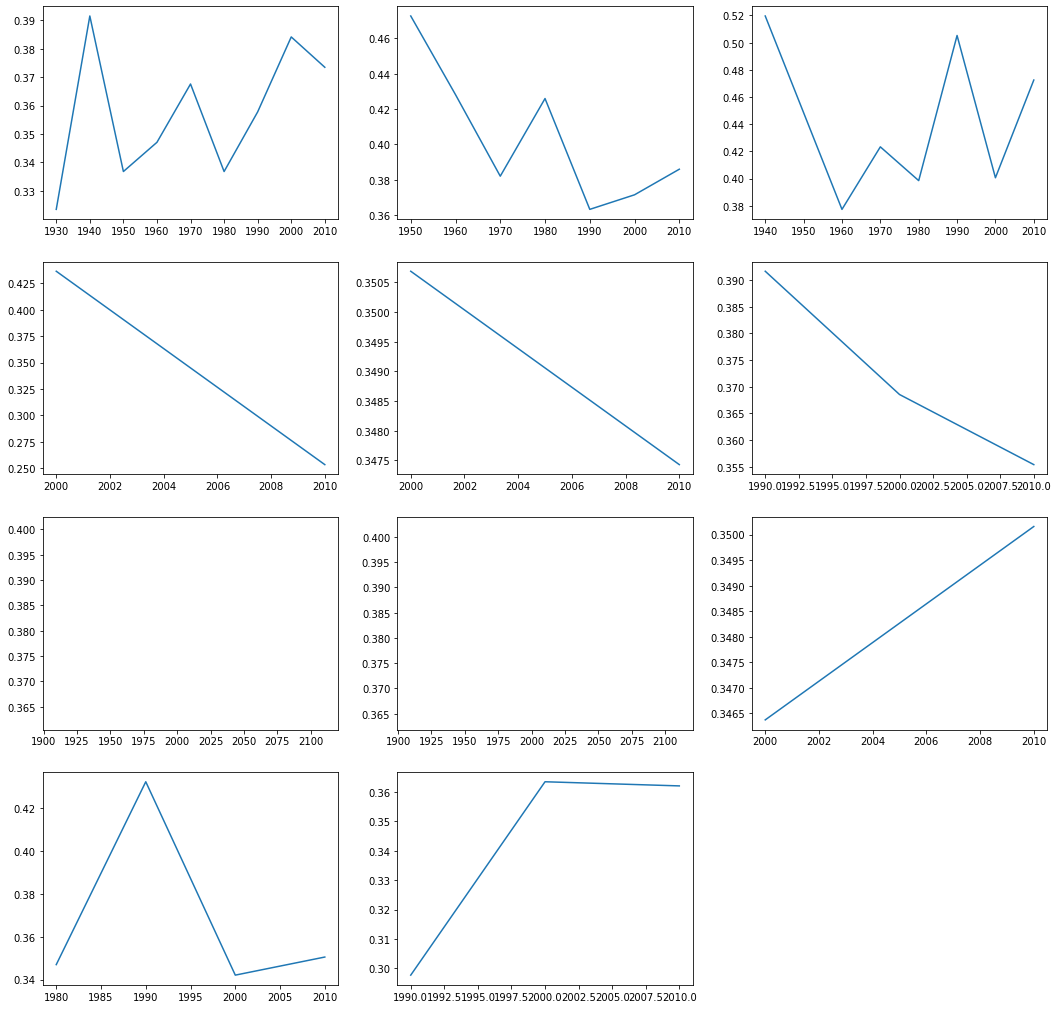

In [119]:
plt.figure(figsize=(18,18))
i=1
for dataframe in df_list:
    
    indexes=dataframe['Avg_PhrLen_Movie'].values
    meandf=dataframe[['Avg_PhrLen_Movie','Decade']].groupby(['Decade']).agg(np.mean)

    y=meandf.values
    x=meandf.index.values
    plt.subplot(4,3,i)
    #print(y)
    #print(x)
    plt.plot(x,y)
    i+=1

plt.show() 

## Distribuzione Movie_len per i film di animazione Disney per decade

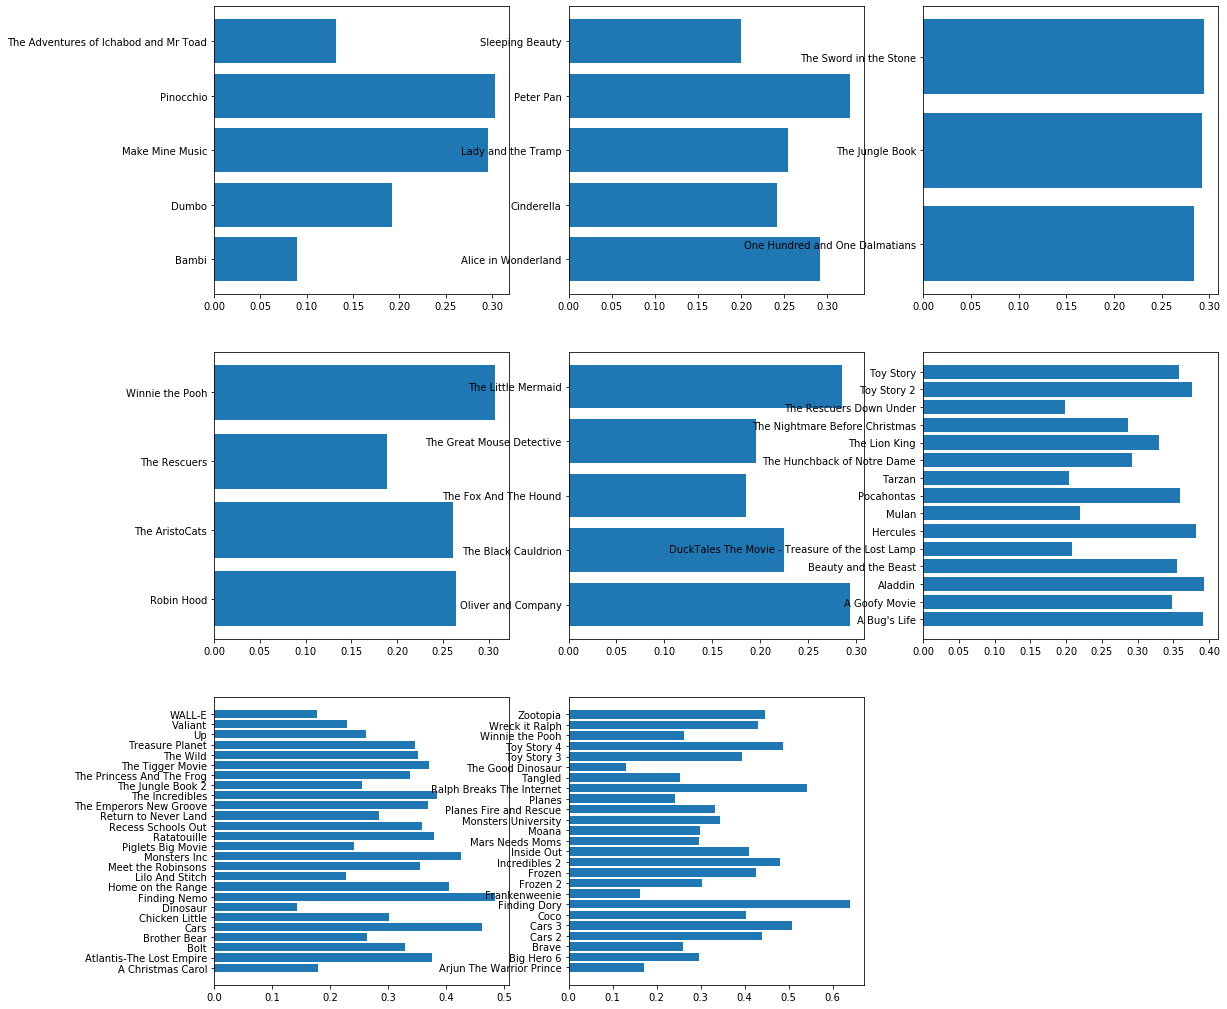

In [120]:
plt.figure(figsize=(18,18))
#fig, ax = plt.subplots()

i=1
for d in range(1940,2010 +1,10):
    ddf=df_disney[df_disney['Decade']== d]
    x=ddf['Movie_len'].values
    ax=plt.subplot(3,3,i)  
    movies= ddf['Title'].values
    y_pos = np.arange(len(movies))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(movies)
    length=x
    ax.barh(y_pos, length, align='center')  
        
    i+=1
plt.show()  

C:\Users\Amministratore\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


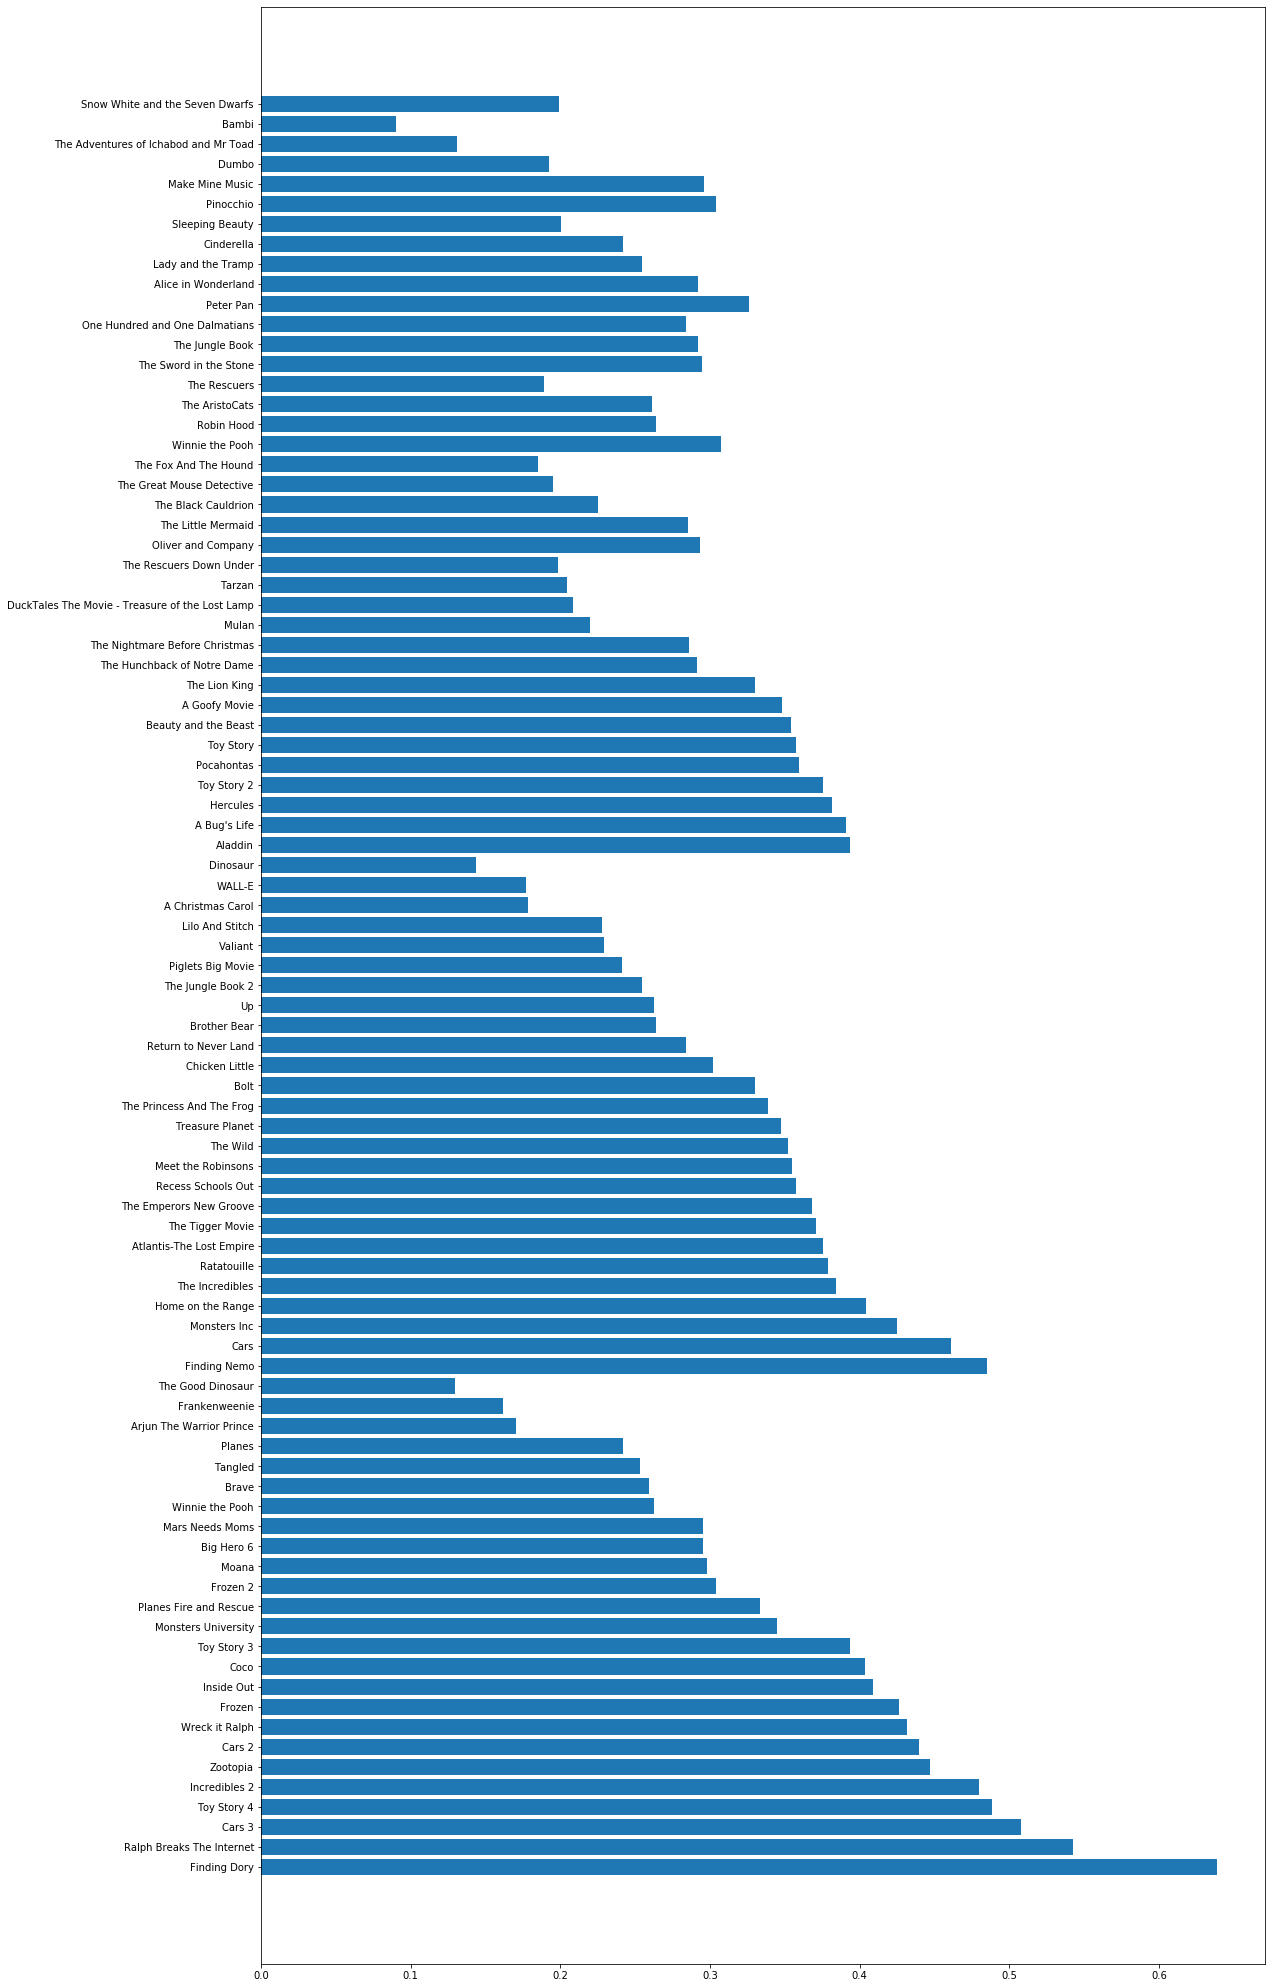

In [121]:
fig, ax = plt.subplots(figsize=(18,36))

df_disney.sort_values(by=['Decade','Movie_len'], inplace= True, ascending=False)
x=df_disney['Movie_len'].values 
movies= df_disney['Title'].values
y_pos = np.arange(len(movies))
ax.set_yticks(y_pos)
ax.set_yticklabels(movies)
length=x
ax.barh(y_pos, length, align='center')  

plt.show()  